# Decorator Function
- Decorators modify the behaviour of functions.
- Input can be any function in general
- Output function is called as wrapper.

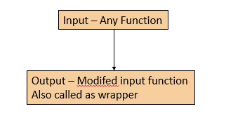

In [1]:
def welcome(func):

    def wrapper(*args,**kwargs):
        print("Welcome user!")
        r = func(*args,**kwargs)
        print(f"Function Result : {r}")
        print("Thank You")
        return r
    return wrapper

### Applying decorator on any function

In [2]:
@welcome
def hypotenuse(a,b):
    h = (a**2 + b**2)**(1/2)
    return h

In [7]:
# input as arguments
h1 = hypotenuse(3,4)

Welcome user!
Function Result : 5.0
Thank You


In [4]:
# We applied decorator on original function.

In [5]:
h1

5.0

In [8]:
# input as kwargs
h2 = hypotenuse(a = 12.1, b = 13.2)

Welcome user!
Function Result : 17.906702655709676
Thank You


In [9]:
@welcome
def simple_interest(p,n,r):
    i = (p*n*r)/100
    a = p + i
    return i, a

In [10]:
i1, a1 = simple_interest(50000, 4, 6.5)

Welcome user!
Function Result : (13000.0, 63000.0)
Thank You


In [11]:
i1

13000.0

In [12]:
a1

63000.0

In [13]:
i2,a2 = simple_interest(p = 73000 , n = 5, r =7.1)

Welcome user!
Function Result : (25915.0, 98915.0)
Thank You


In [14]:
i2

25915.0

In [15]:
a2

98915.0